# 🚦 Smart City Traffic Analytics - Data Exploration

This notebook provides exploratory data analysis of Indian traffic accident data from 2023.

## Contents
1. Data Loading & Overview
2. Data Quality Assessment
3. Statistical Summary
4. Initial Visualizations

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print('Libraries loaded successfully!')

Libraries loaded successfully!


In [2]:
# Set project root path (adjust if running from different location)
# This cell ensures correct paths regardless of where Jupyter is started
import os
import sys

# Get the notebook directory and project root
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(notebook_dir) if 'notebooks' in notebook_dir else notebook_dir

# If running from notebooks folder, go up one level
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('..')
    
# Add project root to path
if os.getcwd() not in sys.path:
    sys.path.insert(0, os.getcwd())

print(f'Working directory: {os.getcwd()}')
print(f'Python path includes: {sys.path[0]}')

Working directory: /home/user/Desktop/traffic_analysis
Python path includes: /home/user/Desktop/traffic_analysis


## 1. Data Loading & Overview

In [3]:
# Load processed data directly (simpler approach without custom modules)
# This works regardless of environment

# Define data paths
DATA_DIR = 'data/processed'

# Load datasets
time_data = pd.read_csv(f'{DATA_DIR}/accidents_time_processed.csv')
month_data = pd.read_csv(f'{DATA_DIR}/accidents_month_processed.csv')
severity_data = pd.read_csv(f'{DATA_DIR}/accidents_severity_processed.csv')
vehicle_data = pd.read_csv(f'{DATA_DIR}/vehicle_registrations_processed.csv')

print('Processed datasets loaded:')
print(f'  - Time data: {time_data.shape}')
print(f'  - Month data: {month_data.shape}')
print(f'  - Severity data: {severity_data.shape}')
print(f'  - Vehicle data: {vehicle_data.shape}')

Processed datasets loaded:
  - Time data: (744, 3)
  - Month data: (1116, 4)
  - Severity data: (93, 6)
  - Vehicle data: (87, 38)


In [4]:
# Preview each dataset
print('Time Data Sample:')
display(time_data.head())

print('\nSeverity Data Sample:')
display(severity_data.head())

Time Data Sample:


,State,TimeSlot,Accidents
0,Andhra Pradesh,00:00-03:00,991
1,Andhra Pradesh,03:00-06:00,1143
2,Andhra Pradesh,06:00-09:00,2256
3,Andhra Pradesh,09:00-12:00,2704
4,Andhra Pradesh,12:00-15:00,3058



Severity Data Sample:


,State,Cases,Injured,Died,FatalityRate,InjuryRate
0,Andhra Pradesh,21078,20409,9284,44.05,96.83
1,Arunachal Pradesh,234,218,137,58.55,93.16
2,Assam,8197,5917,4072,49.68,72.18
3,Bihar,12649,6539,10569,83.56,51.70
4,Chhattisgarh,14003,11743,6699,47.84,83.86


## 2. Data Quality Assessment

In [5]:
# Check for missing values
print('Missing Values Analysis:')
print('='*50)

for name, df in [('Time', time_data), ('Month', month_data), ('Severity', severity_data)]:
    missing = df.isnull().sum().sum()
    print(f'{name}: {missing} missing values ({missing/df.size*100:.2f}%)')

Missing Values Analysis:
Time: 0 missing values (0.00%)
Month: 0 missing values (0.00%)
Severity: 0 missing values (0.00%)


In [6]:
# Check data types
print('Time Data - Column Types:')
display(time_data.dtypes)

Time Data - Column Types:


State        object
TimeSlot     object
Accidents     int64
dtype: object

In [7]:
# Check for duplicates
print('Duplicate Check:')
print(f'  Time data duplicates: {time_data.duplicated().sum()}')
print(f'  Month data duplicates: {month_data.duplicated().sum()}')
print(f'  Severity data duplicates: {severity_data.duplicated().sum()}')

Duplicate Check:
  Time data duplicates: 0
  Month data duplicates: 0
  Severity data duplicates: 0


## 3. Statistical Summary

In [8]:
# Accidents by Time - Statistics
print('Accidents by Time Slot - Statistics:')
time_summary = time_data.groupby('TimeSlot')['Accidents'].agg(['sum', 'mean', 'std', 'min', 'max'])
time_summary['percentage'] = (time_summary['sum'] / time_summary['sum'].sum() * 100).round(2)
display(time_summary)

Accidents by Time Slot - Statistics:


,sum,mean,std,min,max,percentage
TimeSlot,,,,,,
00:00-03:00,84673,910.462366,3609.244075,0,24969,5.53
03:00-06:00,86122,926.043011,3757.051084,0,26020,5.62
06:00-09:00,160166,1722.215054,6997.736583,0,48376,10.46
09:00-12:00,217494,2338.645161,9476.998322,0,65550,14.20
12:00-15:00,229049,2462.892473,10034.493931,0,69397,14.95
15:00-18:00,263384,2832.086022,11632.536585,0,80482,17.19
18:00-21:00,312044,3355.311828,13944.672924,0,95984,20.37
21:00-24:00,178975,1924.462366,7715.856500,1,53251,11.68


In [9]:
# Severity Statistics
print('Severity Statistics (Top 10 States):')
severity_clean = severity_data[~severity_data['State'].str.contains('Total', case=False, na=False)]
display(severity_clean.nlargest(10, 'Cases')[['State', 'Cases', 'Injured', 'Died', 'FatalityRate', 'InjuryRate']])

Severity Statistics (Top 10 States):


,State,Cases,Injured,Died,FatalityRate,InjuryRate
22,Tamil Nadu,69491,72662,20279,29.18,104.56
12,Madhya Pradesh,56475,54703,15807,27.99,96.86
11,Kerala,46392,54327,4495,9.69,117.10
10,Karnataka,43440,52547,12323,28.37,120.96
25,Uttar Pradesh,42001,23905,28103,66.91,56.92
13,Maharashtra,36906,30327,18879,51.15,82.17
20,Rajasthan,25825,23290,12879,49.87,90.18
23,Telangana,23673,21022,8435,35.63,88.80
0,Andhra Pradesh,21078,20409,9284,44.05,96.83
6,Gujarat,17102,15383,8617,50.39,89.95


In [10]:
# Key KPIs
print('KEY PERFORMANCE INDICATORS')
print('='*50)
print(f"Total Accidents: {severity_clean['Cases'].sum():,}")
print(f"Total Deaths: {severity_clean['Died'].sum():,}")
print(f"Total Injured: {severity_clean['Injured'].sum():,}")
print(f"Average Fatality Rate: {severity_clean['FatalityRate'].mean():.2f}%")
print(f"Highest Fatality State: {severity_clean.loc[severity_clean['FatalityRate'].idxmax(), 'State']}")
print(f"Most Accidents State: {severity_clean.loc[severity_clean['Cases'].idxmax(), 'State']}")

KEY PERFORMANCE INDICATORS
Total Accidents: 563,011
Total Deaths: 215,782
Total Injured: 515,210
Average Fatality Rate: 41.79%
Highest Fatality State: Varanasi
Most Accidents State: Tamil Nadu


## 4. Initial Visualizations

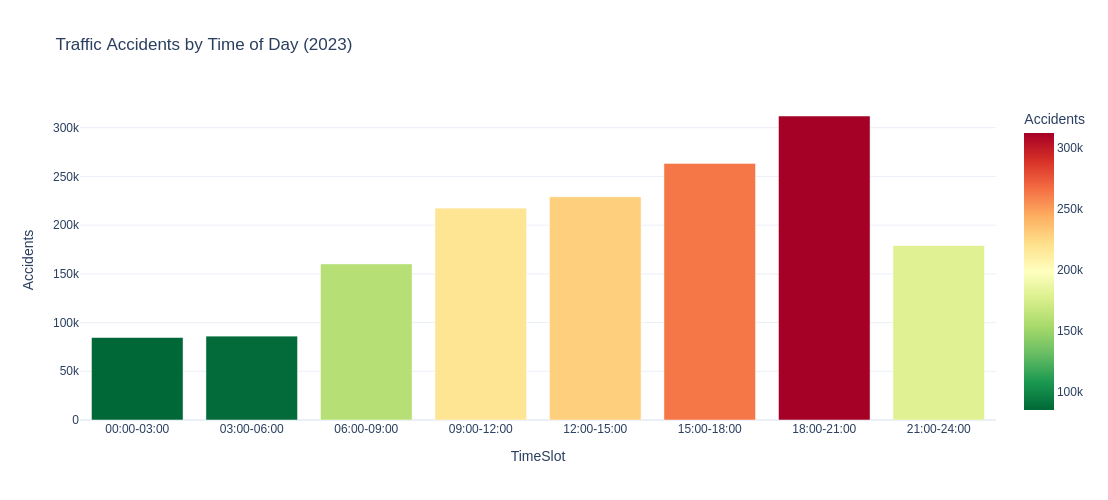

In [11]:
# Accidents by Time Slot
time_agg = time_data.groupby('TimeSlot')['Accidents'].sum().reset_index()
time_order = ['00:00-03:00', '03:00-06:00', '06:00-09:00', '09:00-12:00',
              '12:00-15:00', '15:00-18:00', '18:00-21:00', '21:00-24:00']
time_agg['TimeOrder'] = time_agg['TimeSlot'].apply(lambda x: time_order.index(x) if x in time_order else 99)
time_agg = time_agg.sort_values('TimeOrder')

fig = px.bar(time_agg, x='TimeSlot', y='Accidents', 
             title='Traffic Accidents by Time of Day (2023)',
             color='Accidents', color_continuous_scale='RdYlGn_r')
fig.update_layout(template='plotly_white', height=500)
fig.show()

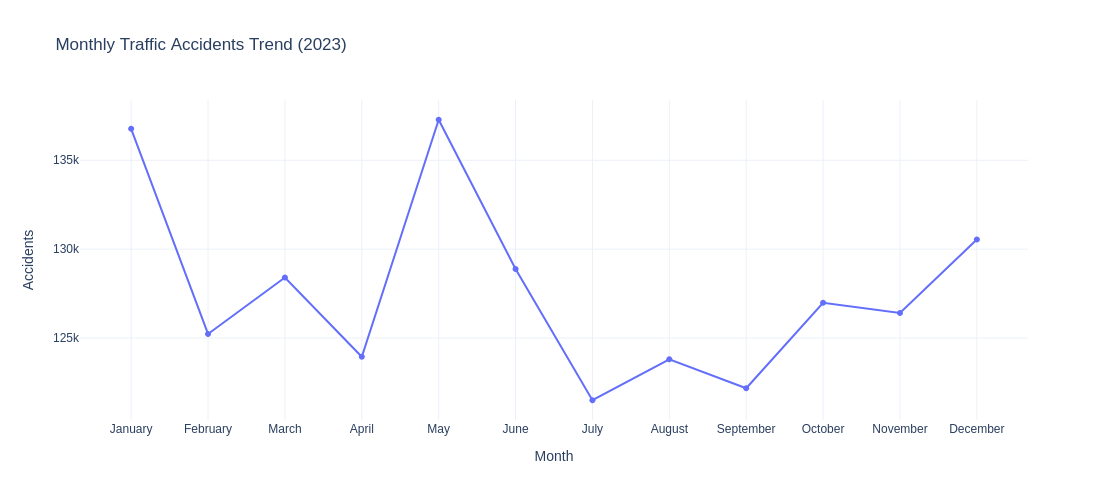

In [12]:
# Monthly Trend
month_agg = month_data.groupby(['Month', 'MonthNum'])['Accidents'].sum().reset_index()
month_agg = month_agg.sort_values('MonthNum')

fig = px.line(month_agg, x='Month', y='Accidents', markers=True,
              title='Monthly Traffic Accidents Trend (2023)')
fig.update_layout(template='plotly_white', height=500)
fig.show()

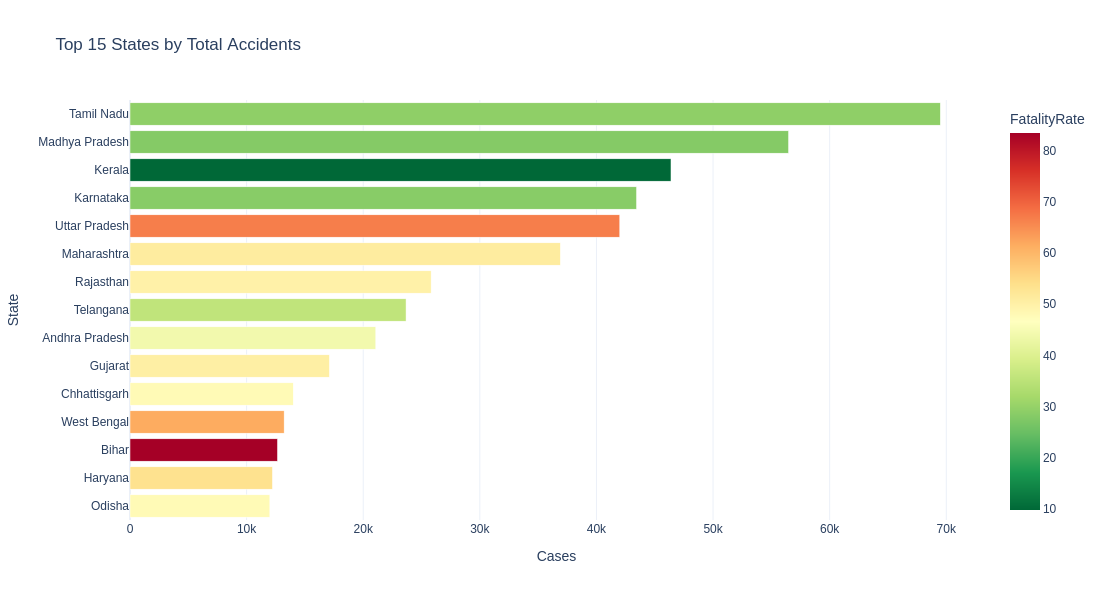

In [13]:
# Top 15 States by Accidents
top_states = severity_clean.nlargest(15, 'Cases')

fig = px.bar(top_states, x='Cases', y='State', orientation='h',
             title='Top 15 States by Total Accidents',
             color='FatalityRate', color_continuous_scale='RdYlGn_r')
fig.update_layout(template='plotly_white', height=600, yaxis={'categoryorder':'total ascending'})
fig.show()

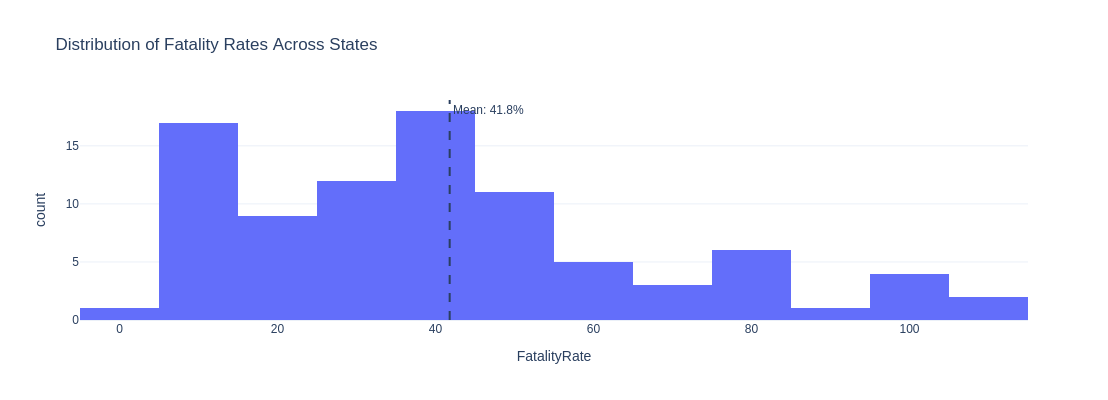

In [14]:
# Fatality Rate Distribution
fig = px.histogram(severity_clean, x='FatalityRate', nbins=20,
                   title='Distribution of Fatality Rates Across States')
fig.add_vline(x=severity_clean['FatalityRate'].mean(), line_dash='dash', 
              annotation_text=f"Mean: {severity_clean['FatalityRate'].mean():.1f}%")
fig.update_layout(template='plotly_white', height=400)
fig.show()

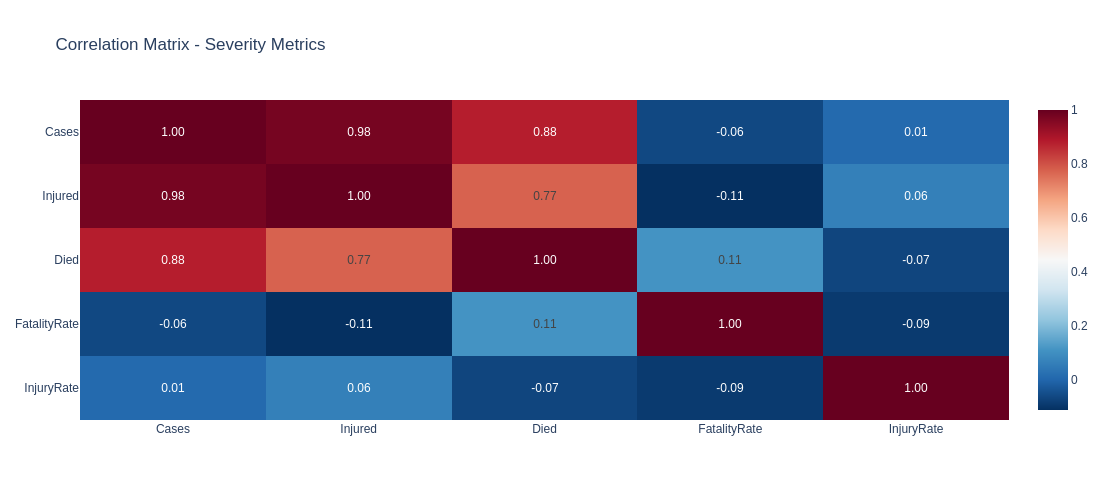

In [15]:
# Correlation Heatmap
numeric_cols = severity_clean.select_dtypes(include=[np.number]).columns
corr_matrix = severity_clean[numeric_cols].corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect='auto',
                title='Correlation Matrix - Severity Metrics',
                color_continuous_scale='RdBu_r')
fig.update_layout(template='plotly_white', height=500)
fig.show()

## Key Findings

1. **Peak Hours**: Evening hours (18:00-21:00) have the highest accident frequency
2. **Safest Hours**: Early morning (00:00-06:00) has the lowest accidents
3. **High-Risk States**: States with highest fatality rates need targeted intervention
4. **Seasonal Pattern**: Monthly variation exists but is relatively stable

---
*Continue to Notebook 02 for Pattern Analysis*